In [1]:
# Import required libraries :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import pandas_profiling
from lifelines import KaplanMeierFitter

In [2]:
mtdata = pd.read_excel("Mean Methylation Univariate freash.xlsx", sheet_name="KNN")

In [3]:
mtdata

,ProbeID,tcga_participant_barcode,CLI_vital_status,CLI_days_to_death,CLI_days_to_last_followup,CLI_Time,cg13295878,cg15849060,cg07473553,cg08210297,...,cg24537237,cg08836861,cg02733351,cg05626664,cg07359183,cg04968426,cg23382741,cg26474043,cg07402003,cg03607648
0,TCGA_2J_AAB1_01A_11D_A40Y_05,TCGA-2J-AAB1,1,66.0,NaN,66,0.396751,0.274810,0.433582,0.422392,...,0.507246,0.316477,0.505785,0.184812,0.514973,0.479768,0.504655,0.210223,0.484606,0.503621
1,TCGA_2J_AAB4_01A_12D_A40Y_05,TCGA-2J-AAB4,0,NaN,729.0,729,0.702479,0.678716,0.564798,0.517123,...,0.360991,0.526906,0.652800,0.523084,0.687496,0.612466,0.659193,0.335716,0.643872,0.602027
2,TCGA_2J_AAB6_01A_11D_A40Y_05,TCGA-2J-AAB6,1,293.0,NaN,293,0.471978,0.354534,0.298581,0.472595,...,0.247568,0.734329,0.358583,0.203829,0.472108,0.879447,0.715112,0.288741,0.539882,0.855755
3,TCGA_2J_AAB8_01A_12D_A40Y_05,TCGA-2J-AAB8,0,NaN,80.0,80,0.609990,0.496876,0.648355,0.555750,...,0.473961,0.589446,0.687478,0.538165,0.660582,0.575826,0.670015,0.461948,0.667509,0.563663
4,TCGA_2J_AAB9_01A_11D_A40Y_05,TCGA-2J-AAB9,1,627.0,NaN,627,0.675446,0.521811,0.796960,0.723681,...,0.507329,0.682679,0.701910,0.669112,0.818909,0.795380,0.813350,0.478596,0.872877,0.857733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,TCGA_XN_A8T5_01A_12D_A368_05,TCGA-XN-A8T5,0,NaN,720.0,720,0.789064,0.741352,0.832049,0.648034,...,0.527572,0.610753,0.846096,0.538158,0.796798,0.711883,0.837027,0.583392,0.778226,0.738059
178,TCGA_YB_A89D_01A_12D_A368_05,TCGA-YB-A89D,0,NaN,350.0,350,0.519166,0.514459,0.560912,0.530510,...,0.333987,0.423772,0.513998,0.361875,0.600484,0.692344,0.599511,0.350597,0.474888,0.532041
179,TCGA_YH_A8SY_01A_11D_A378_05,TCGA-YH-A8SY,0,NaN,388.0,388,0.706387,0.692145,0.532077,0.536887,...,0.380919,0.646555,0.649224,0.435494,0.591242,0.677212,0.728398,0.306379,0.614303,0.659911
180,TCGA_YY_A8LH_01A_11D_A368_05,TCGA-YY-A8LH,0,NaN,2016.0,2016,0.387372,0.332280,0.250432,0.453464,...,0.191940,0.209630,0.253300,0.316622,0.272191,0.483404,0.338221,0.205719,0.310250,0.368104


In [4]:
mtdata.head()
# pandas_profiling.ProfileReport(mtdata)
ndf =mtdata.fillna(0)


**Data distribution**

Prior to starting the model fitting process, save the time variable in *T* and the event/status variable in *E*.

To gain a general sense of the distribution, let's plot a histogram of the time variable. According to the histogram, the time variable almost exhibits a Weibull or Log-normal distribution. During the phase of AFT model estimation, we shall verify that.

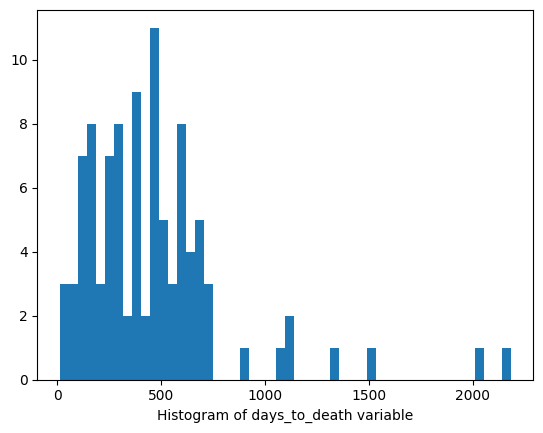

In [5]:
T = mtdata["CLI_days_to_death"]
E = mtdata["CLI_vital_status"]
plt.hist(T, bins = 50)
plt.xlabel("Histogram of days_to_death variable")
plt.show()


### Estimation of the Kaplan-Maier Curve (Non-Parametric)

First, we have a collection of patient deaths or other events. While we watch some patients, others might be rightly censored. In other words, we know that they existed up until a certain point but are unsure of what transpired later. In clinical trials, censoring could occur as a result of participants dropping out or the study coming to an end. Frequently, we just have one straightforward variable, if not none at all, with which to stratify our patients. Estimating the survival function is something we're interested in.


$$ $$


In [6]:
kmf_s = KaplanMeierFitter()

In [7]:
kmf_s.fit(ndf["CLI_days_to_death"], ndf["CLI_vital_status"])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 182 total observations, 83 right-censored observations>

In [8]:
#predicting the survival probality


In [9]:
kmf_s.survival_function_

,KM_estimate
timeline,
0.0,1.000000
12.0,0.989899
31.0,0.979798
41.0,0.969697
61.0,0.959596
...,...
1130.0,0.040404
1332.0,0.030303
1502.0,0.020202


<Axes: xlabel='timeline'>

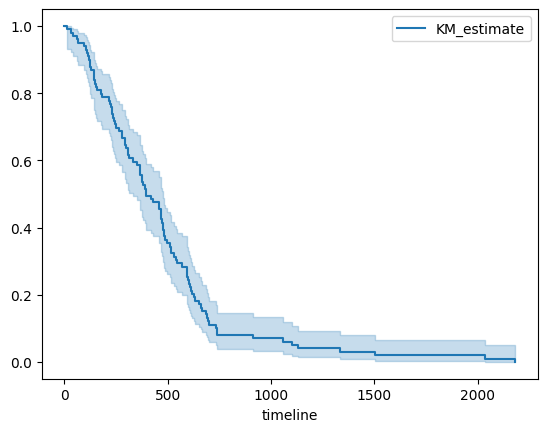

In [10]:
kmf_s.plot_survival_function()

The curve shows how the likelihood of survival changes throughout the time horizon. The likelihood that a patent will survive over time decreases.

Using the `.survival_function_.plot()` method, we can generate the same plot without the 95% confidence interval.

Text(0.5, 1.0, 'Survival function')

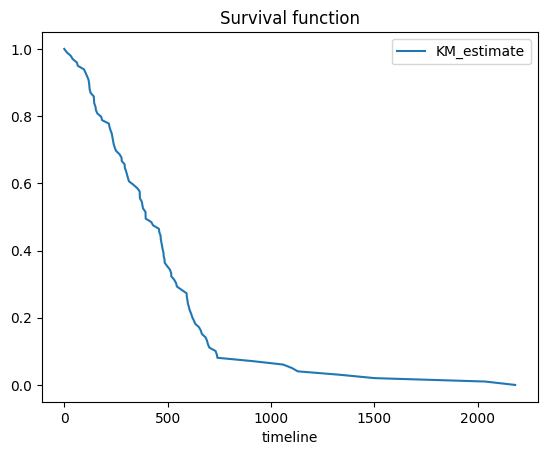

In [11]:
kmf_s.survival_function_.plot()
plt.title('Survival function')

Moreover, a failure curve can be drawn. It is the exact opposite of survival, i.e., the likelihood of failure or death over time.

<Axes: xlabel='timeline'>

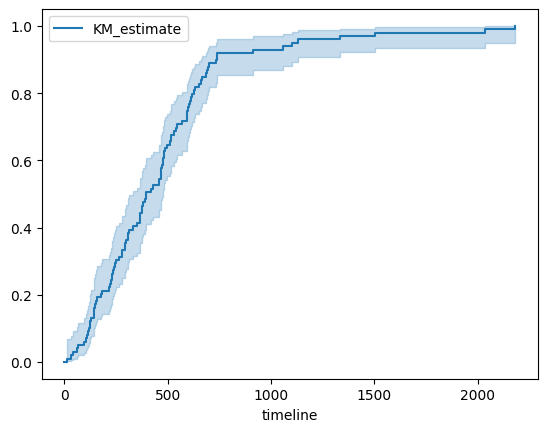

In [12]:
kmf_s.plot_cumulative_density()

In [13]:
ndf.drop(['ProbeID', 'tcga_participant_barcode','CLI_days_to_last_followup'], axis=1)
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi
rossi_dataset = ndf.drop(['ProbeID', 'tcga_participant_barcode','CLI_days_to_last_followup'], axis=1)
cph = CoxPHFitter()
cph.fit(rossi_dataset, duration_col='CLI_days_to_death', event_col='CLI_vital_status')
cph.print_summary() 

C:\Users\PRANTIK\AppData\Local\Programs\Python\Python311\Lib\site-packages\lifelines\fitters\coxph_fitter.py:1614: ConvergenceWarning: Newton-Raphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model
  warnings.warn(


<lifelines.CoxPHFitter: fitted with 182 total observations, 83 right-censored observations>
             duration col = 'CLI_days_to_death'
                event col = 'CLI_vital_status'
      baseline estimation = breslow
   number of observations = 182
number of events observed = 99
   partial log-likelihood = -160.94
         time fit was run = 2023-12-14 11:12:45 UTC

---
             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                          
CLI_Time    -0.02       0.98       0.00            -0.03            -0.02                 0.97                 0.98
cg13295878   1.15       3.14       4.35            -7.39             9.68                 0.00             15975.81
cg15849060  -0.59       0.55       3.59            -7.63             6.45                 0.00               635.49
cg07473553  -0.77       0.46       2.03            -4.74             3.20                 0.01                24.65
cg08210297   0.36       1.43       2.14            -3.84             4.55                 0.02                94.58
cg14659346   0.58       1.79       1.37            -2.10             3.27                 0.12                26.21
cg19654061  -0.14       0.87       3.02            -6.06             5.77                 0.00               321.26
cg09291474   4.57      96.68       5.17            -5.56            14.70                 0.00             2.42e+06
cg08196512  -0.03       0.97       5.11           -10.04             9.98                 0.00             21490.45
cg15944459  -1.28       0.28       3.17            -7.50             4.94                 0.00               139.23
cg27505627  -0.53       0.59       3.82            -8.02             6.96                 0.00              1052.52
cg08006182   0.90       2.47       2.39            -3.78             5.59                 0.02               266.51
cg20140201   0.31       1.36       2.31            -4.23             4.85                 0.01               127.18
cg04804772  -2.16       0.11       2.71            -7.48             3.15                 0.00                23.30
cg07010146   0.09       1.09       6.22           -12.11            12.29                 0.00             2.17e+05
cg11957248  -2.45       0.09       7.59           -17.32            12.43                 0.00             2.49e+05
cg12184624   2.84      17.18       5.24            -7.42            13.11                 0.00             4.95e+05
cg27658026   3.95      51.75       6.99            -9.75            17.65                 0.00             4.61e+07
cg09060908  -0.76       0.47       1.09            -2.90             1.38                 0.05                 3.98
cg19249749   1.01       2.75       2.02            -2.95             4.97                 0.05               144.49
cg27235315  -1.00       0.37       2.99            -6.87             4.86                 0.00               129.31
cg06601993   0.03       1.03       1.54            -2.99             3.04                 0.05                20.95
cg05209483   0.32       1.38       2.30            -4.18             4.82                 0.02               123.89
cg14754494  -0.15       0.86       1.75            -3.58             3.28                 0.03                26.53
cg03531754   0.30       1.35       2.09            -3.79             4.39                 0.02                80.78
cg08823209   0.22       1.25       3.85            -7.32             7.77                 0.00              2365.44
cg21965980  -1.28       0.28       2.74            -6.64             4.09                 0.00                59.58
cg12183875  -0.50       0.61       2.34            -5.09             4.09                 0.01                59.82
cg25152942  -1.79       0.17       2.57            -6.83             3.25                 0.00                25.70
cg27051686   3.05      21

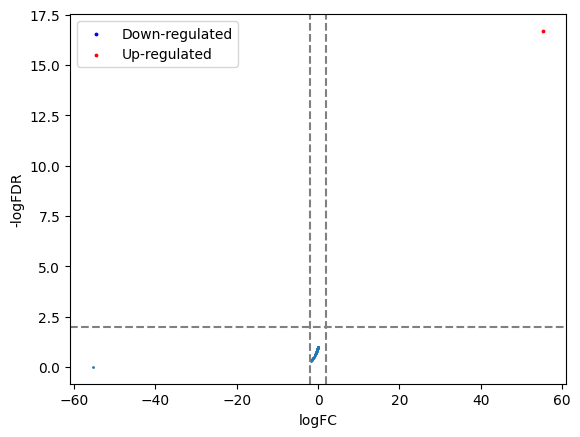

In [14]:
cph_data = cph.summary
cph_data.rename(columns = {'-log2(p)':'logFC'}, inplace = True)

plt.scatter(x=cph_data['logFC'].apply(lambda x:-x),y=cph_data['p'],s=1)
# highlight down- or up- regulated genes
down = cph_data[(cph_data['logFC']<=-2)&(cph_data['p']<=0.05)]
up = cph_data[(cph_data['logFC']>=2)&(cph_data['p']<=0.05)]

plt.scatter(x=down['logFC'],y=down['p'].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
plt.scatter(x=up['logFC'],y=up['p'].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")

plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-2,color="grey",linestyle="--")
plt.axvline(2,color="grey",linestyle="--")
plt.axhline(2,color="grey",linestyle="--")
plt.legend()

In [15]:
cph

<lifelines.CoxPHFitter: fitted with 182 total observations, 83 right-censored observations>

<Axes: xlabel='log(HR) (95% CI)'>

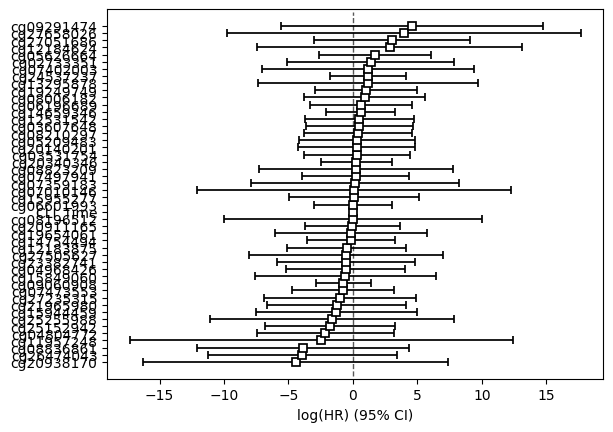

In [16]:
cph.plot()

<Axes: >

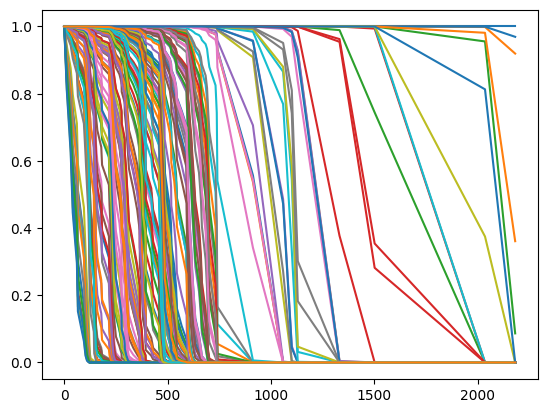

In [17]:
cph.predict_survival_function(ndf).plot(legend=None)


In [18]:
log_lambda = cph.params_['cg13295878']
log_lambda

1.1455807811395522

In [19]:
cph_data = cph.summary.query('p < 0.05')
cph_data

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
CLI_Time,-0.022108,0.978134,0.002604,-0.027212,-0.017005,0.973155,0.983138,0.0,-8.491207,2.045023e-17,55.440661


We explore the *Cox's proportional* hazards model's variable selection issue and suggest a unified model selection and estimate method with the desired theoretical features and ease of computation. The adaptive Lasso estimator is produced by the novel approach, which is based on a penalised log partial likelihood with the adaptively weighted $L_1$ penalty on regression coefficients. The approach uses varying penalties for various coefficients. Insignificant variables are subject to greater penalties than important ones, which results in a tendency for important variables to be kept in the selection process while unimportant variables are more likely to be eliminated. Test is done on the estimator's theoretical characteristics, including consistency and rate of convergence.

**Adaptive Lasso estimator** is the solution of

$$\underbrace{\mathrm{min}}_{\beta } \left\{-\frac{1}{n}l_n\left(\beta \right)+\lambda \sum^d_{j=1}{\left|{\beta }_j\right|{\tau }_j}\right\}     (1)$$ 



where the positive weights $\tau = (\tau_{1}, \tau_{2}, ....,\tau_{d})^{T}$ are determined based on data in an adaptive manner. For the solution to be optimal, the values selected for the $\tau_{j}$'s are essential. Utilizing ${\tau }_j=1/\left|\tilde{{\beta }_j}\right|$ (where $\tilde{\beta}$ = $(\beta_{1},..., \beta_{d})^{T}$ is the maximizer of the log partial likelihood $l_{n}(\beta)$) is our suggestion. As consistent estimators, their values accurately reflect the relative weights of the covariates (*Tsiatis, 1981; Andersen & Gill, 1982*). Therefore, we concentrate on the issue.
$$\underbrace{\mathrm{min}}_{\beta } \left\{-\frac{1}{n}l_n\left(\beta \right)+\lambda \sum^d_{j=1}{\left|{\beta }_j\right|/\left|\tilde{{\beta }_j}\right|}\right\} (2)$$

Any reliable estimates of ${\beta}$ may be utilised; ${\tilde{\beta}}$ is merely a practical option. In the wavelet literature (*Donoho & Johnstone, 1998; Antoniadis & Fan, 2001*), the $L_{0}$ penalty $\sum_{j=1}^{d}{I(\tilde{\beta_{j}}\not=0)}$  also known as the **entropy penalty**, is closely connected to the adaptive penalty factor in equation (2). The term ${\left|{\beta }_j\right|/\left|\tilde{{\beta }_j}\right|}$ converges to ${I(\tilde{\beta_{j}}\not=0)}$with probability as $n \to \infty$ because of the consistency of $\tilde{\beta_{j}}$. As a result, in an asymptotic sense, the adaptive Lasso technique can be seen as an automatic implementation of best-subset selection.

In [20]:
import asgl

In [21]:
number_observations = 182
number_variables = 47
number_significant_variables = 7

In [22]:
x_data = mtdata[mtdata.columns[5:52]]
x_data

y_data = mtdata["CLI_vital_status"]
y_data

0      1
1      0
2      1
3      0
4      1
      ..
177    0
178    0
179    0
180    0
181    0
Name: CLI_vital_status, Length: 182, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.utils import Bunch

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data ,test_size = 0.2, shuffle=False)
feature_names = list(x_data.columns.values) #adjust accordingly
target_names = ["CLI_vital_status"]
# lasso_data = {"data":x_data.to_numpy(), "target":y_data.to_numpy()}
lasso_data = Bunch(data=np.array(x_data), target=np.array(y_data), feature_names = feature_names, target_names = target_names)


In [24]:
import sklearn.datasets

x, y, true_beta = sklearn.datasets.make_regression(
  n_samples=number_observations, n_features=number_variables, 
  n_informative=number_significant_variables, n_targets=1, 
  bias=10.0, noise=1.0, shuffle=True, coef=True, random_state=1)

In [25]:
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

# import glmnet_python
# from glmnet import glmnet
# from glmnetPrint import glmnetPrint; from glmnetCoef import glmnetCoef; from glmnetPredict import glmnetPredict
# from cvglmnet import cvglmnet; from cvglmnetCoef import cvglmnetCoef
# from cvglmnetPlot import cvglmnetPlot; from cvglmnetPredict import cvglmnetPredict
# import scipy
# # create weights
# t = np.ones((182, 1), dtype = scipy.float64)
# wts = np.row_stack((t))

# fit = glmnet(x = np.float64(x_data), y = np.float64(y_data),weights = wts, family = 'gaussian', alpha = 0.2, nlambda = 20)

In [54]:
from outcome_adaptive_lasso import calc_outcome_adaptive_lasso, generate_synthetic_dataset

    `DEFINE FUNCTION calc_outcome_adaptive_lasso(A, Y, X, gamma_convergence_factor=2, log_lambdas=None):

    """Calculate estimate of average treatment effect using the outcome adaptive LASSO (Shortreed and Ertefaie, 2017)

    Parameters

    ----------

    A : Exposure (=treatment, intervention) - pandas series or one-dimensional numpy array

    Y : Outcome - pandas series or one-dimensional numpy array

    X : Covariates - pandas dataframe or two-dimensional numpy array (shape n_samples, n_covariates)

    log_lambdas : log of lambda - strength of adaptive LASSO regularization.

        If log_lambdas has multiple values, lambda will be selected according to the minimal absolute mean difference,

        as suggested IN the paper

        If None, it will be set to the suggested search list IN the paper:

        [-10, -5, -2, -1, -0.75, -0.5, -0.25, 0.25, 0.49]

    gamma_convergence_factor : a constant to couple between lambda and gamma, the single-feature penalization strength

        SET The equation relating gamma and lambda is lambda * n^(gamma/2 -1) TO n^gamma_convergence_factor

        Default value is 2, as suggested IN the paper FOR the synthetic dataset experiments

    Returns

    -------

    ate : estimate of the average treatment effect

    """



    SET A, Y, X TO check_INPUT(A, Y, X)



    IF log_lambdas is None:

        SET # log_lambdas TO [-2, -1, -0.75, -0.5, -0.25, 0.25, 0.49]

        SET log_lambdas TO [-4.791339,6.739686,-8.728991,11.089071,-5.492427,-23.878899, 9.901651]

    SET n TO A.shape[0]

    SET lambdas TO n ** np.array(log_lambdas)

    SET amd_vec TO np.zeros(lambdas.shape[0])

    SET ate_vec TO np.zeros(lambdas.shape[0])



    # Calculate ATE FOR each lambda, select the one minimizing the weighted absolute mean difference

    FOR il IN range(len(lambdas)):

        SET ate_vec[il], x_coefs, ipw TO calc_outcome_adaptive_lasso_single_lambda(A, Y, X, lambdas[il], gamma_convergence_factor)

        SET amd_vec[il] TO calc_wamd(A, X, ipw, x_coefs)



    SET ate_vec TO [x - (max(ate_vec)+1) FOR x IN ate_vec]

    

    RETURN ate_vec`


In [27]:
# x_data[x_data.columns[46]]
Y = mtdata['CLI_days_to_death'].fillna(0)
Y = [(t-Y.mean())/np.std(Y)  for t in Y]

In [28]:
ate = calc_outcome_adaptive_lasso(mtdata['CLI_vital_status'], np.array(Y), x_data)

C:\Users\PRANTIK\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\research-work\akashbarariya\outcome_adaptive_lasso\outcome_adaptive_lasso.py:100: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ate_vec[il], x_coefs, ipw = calc_outcome_adaptive_lasso_single_lambda(A, Y, X, lambdas[il], gamma_convergence_factor)
D:\research-work\akashbarariya\outcome_adaptive_lasso\outcome_adaptive_lasso.py:100: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ate_vec[il], x_coefs, ipw = calc_outcome_adaptive_lasso_single_lambda(A, Y, X, lambdas[il], gamma_convergence_factor)
C:\Users\PRANTIK\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250

In [29]:
# df = generate_synthetic_dataset(n=200, d=100, rho=0, eta=0, scenario_num=4)
mean_methylation_value = [mtdata['cg20140201'].mean(), mtdata['cg05209483'].mean(), mtdata['cg12183875'].mean(), mtdata['cg25152942'].mean(), mtdata['cg12531542'].mean(), mtdata['cg20938170'].mean(), mtdata['cg25255988'].mean() ]

In [30]:
ate

[-1.011798114572534,
 -1.3921005020637427,
 -1.0006227343865026,
 -1.3921005020637427,
 -0.9999999999999998,
 -1.0719995748937425,
 -1.3921005020637427]

In [31]:
def risk_score():
    risk_score = list()
    for i in range(0, len(mtdata)):
        risk_score.append(ate[0]*mtdata.iloc[i]['cg20140201']+ate[1]*mtdata.iloc[i]['cg05209483']+ate[2]*mtdata.iloc[i]['cg12183875']+ate[3]*mtdata.iloc[i]['cg25152942']+ate[4]*mtdata.iloc[i]['cg12531542']+ate[5]*mtdata.iloc[i]['cg20938170']+ate[6]*mtdata.iloc[i]['cg25255988']);
    return np.array(risk_score)

risk_score()

array([-2.92003409, -4.50792321, -3.49630906, -4.12490751, -5.58514171,
       -4.28937993, -3.6771597 , -4.40930485, -3.30844755, -4.08162488,
       -4.92579349, -3.45309115, -5.58752096, -5.37596268, -4.67118661,
       -3.77331474, -6.06089434, -2.57770142, -3.20272978, -4.53892764,
       -3.39639263, -3.80249922, -5.16801029, -4.72219356, -3.9188244 ,
       -4.71865939, -3.89412203, -3.92614777, -3.52288684, -6.16365669,
       -6.7611203 , -6.2568787 , -6.39440203, -6.27622823, -6.6066609 ,
       -3.53907774, -6.44859887, -5.45637941, -3.62712802, -3.11306407,
       -5.21054793, -3.50426013, -2.06925295, -6.51451059, -5.60285475,
       -5.70334179, -4.37675212, -5.19453009, -4.75015357, -3.46204486,
       -5.12268313, -5.13969352, -2.50288516, -4.51733621, -3.1068706 ,
       -4.50054378, -3.26155007, -3.97761706, -4.99155124, -2.47921697,
       -4.27220101, -1.94017211, -2.72759417, -4.0523707 , -3.407771  ,
       -3.89605963, -2.85182301, -4.43099652, -3.70924845, -3.67

$${\left(x+a\right)}^n=\int^n_{k=0}{\left(\genfrac{}{}{0pt}{}{n}{k}\right)x^ka^{n-k}}$$

In [32]:
rs_median= np.mean(risk_score())
rs_median

-4.307972506486822

**Total number of patient is 182. Median of the risk score is -4.016729324989981. Classifying the patient data in High risk and low risk group with restpect to median.**

In [33]:
HR = np.where(risk_score() > rs_median)
LR =  np.where(risk_score() < rs_median)

In [34]:
len(HR[0])

90

In [35]:
len(LR[0])

92

In [36]:
mtdata

,ProbeID,tcga_participant_barcode,CLI_vital_status,CLI_days_to_death,CLI_days_to_last_followup,CLI_Time,cg13295878,cg15849060,cg07473553,cg08210297,...,cg24537237,cg08836861,cg02733351,cg05626664,cg07359183,cg04968426,cg23382741,cg26474043,cg07402003,cg03607648
0,TCGA_2J_AAB1_01A_11D_A40Y_05,TCGA-2J-AAB1,1,66.0,NaN,66,0.396751,0.274810,0.433582,0.422392,...,0.507246,0.316477,0.505785,0.184812,0.514973,0.479768,0.504655,0.210223,0.484606,0.503621
1,TCGA_2J_AAB4_01A_12D_A40Y_05,TCGA-2J-AAB4,0,NaN,729.0,729,0.702479,0.678716,0.564798,0.517123,...,0.360991,0.526906,0.652800,0.523084,0.687496,0.612466,0.659193,0.335716,0.643872,0.602027
2,TCGA_2J_AAB6_01A_11D_A40Y_05,TCGA-2J-AAB6,1,293.0,NaN,293,0.471978,0.354534,0.298581,0.472595,...,0.247568,0.734329,0.358583,0.203829,0.472108,0.879447,0.715112,0.288741,0.539882,0.855755
3,TCGA_2J_AAB8_01A_12D_A40Y_05,TCGA-2J-AAB8,0,NaN,80.0,80,0.609990,0.496876,0.648355,0.555750,...,0.473961,0.589446,0.687478,0.538165,0.660582,0.575826,0.670015,0.461948,0.667509,0.563663
4,TCGA_2J_AAB9_01A_11D_A40Y_05,TCGA-2J-AAB9,1,627.0,NaN,627,0.675446,0.521811,0.796960,0.723681,...,0.507329,0.682679,0.701910,0.669112,0.818909,0.795380,0.813350,0.478596,0.872877,0.857733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,TCGA_XN_A8T5_01A_12D_A368_05,TCGA-XN-A8T5,0,NaN,720.0,720,0.789064,0.741352,0.832049,0.648034,...,0.527572,0.610753,0.846096,0.538158,0.796798,0.711883,0.837027,0.583392,0.778226,0.738059
178,TCGA_YB_A89D_01A_12D_A368_05,TCGA-YB-A89D,0,NaN,350.0,350,0.519166,0.514459,0.560912,0.530510,...,0.333987,0.423772,0.513998,0.361875,0.600484,0.692344,0.599511,0.350597,0.474888,0.532041
179,TCGA_YH_A8SY_01A_11D_A378_05,TCGA-YH-A8SY,0,NaN,388.0,388,0.706387,0.692145,0.532077,0.536887,...,0.380919,0.646555,0.649224,0.435494,0.591242,0.677212,0.728398,0.306379,0.614303,0.659911
180,TCGA_YY_A8LH_01A_11D_A368_05,TCGA-YY-A8LH,0,NaN,2016.0,2016,0.387372,0.332280,0.250432,0.453464,...,0.191940,0.209630,0.253300,0.316622,0.272191,0.483404,0.338221,0.205719,0.310250,0.368104


In [37]:
len(mtdata)


182

In [38]:
mtdata['risk_score'] =risk_score()

In [39]:
mtdata


,ProbeID,tcga_participant_barcode,CLI_vital_status,CLI_days_to_death,CLI_days_to_last_followup,CLI_Time,cg13295878,cg15849060,cg07473553,cg08210297,...,cg08836861,cg02733351,cg05626664,cg07359183,cg04968426,cg23382741,cg26474043,cg07402003,cg03607648,risk_score
0,TCGA_2J_AAB1_01A_11D_A40Y_05,TCGA-2J-AAB1,1,66.0,NaN,66,0.396751,0.274810,0.433582,0.422392,...,0.316477,0.505785,0.184812,0.514973,0.479768,0.504655,0.210223,0.484606,0.503621,-2.920034
1,TCGA_2J_AAB4_01A_12D_A40Y_05,TCGA-2J-AAB4,0,NaN,729.0,729,0.702479,0.678716,0.564798,0.517123,...,0.526906,0.652800,0.523084,0.687496,0.612466,0.659193,0.335716,0.643872,0.602027,-4.507923
2,TCGA_2J_AAB6_01A_11D_A40Y_05,TCGA-2J-AAB6,1,293.0,NaN,293,0.471978,0.354534,0.298581,0.472595,...,0.734329,0.358583,0.203829,0.472108,0.879447,0.715112,0.288741,0.539882,0.855755,-3.496309
3,TCGA_2J_AAB8_01A_12D_A40Y_05,TCGA-2J-AAB8,0,NaN,80.0,80,0.609990,0.496876,0.648355,0.555750,...,0.589446,0.687478,0.538165,0.660582,0.575826,0.670015,0.461948,0.667509,0.563663,-4.124908
4,TCGA_2J_AAB9_01A_11D_A40Y_05,TCGA-2J-AAB9,1,627.0,NaN,627,0.675446,0.521811,0.796960,0.723681,...,0.682679,0.701910,0.669112,0.818909,0.795380,0.813350,0.478596,0.872877,0.857733,-5.585142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,TCGA_XN_A8T5_01A_12D_A368_05,TCGA-XN-A8T5,0,NaN,720.0,720,0.789064,0.741352,0.832049,0.648034,...,0.610753,0.846096,0.538158,0.796798,0.711883,0.837027,0.583392,0.778226,0.738059,-5.130479
178,TCGA_YB_A89D_01A_12D_A368_05,TCGA-YB-A89D,0,NaN,350.0,350,0.519166,0.514459,0.560912,0.530510,...,0.423772,0.513998,0.361875,0.600484,0.692344,0.599511,0.350597,0.474888,0.532041,-3.801061
179,TCGA_YH_A8SY_01A_11D_A378_05,TCGA-YH-A8SY,0,NaN,388.0,388,0.706387,0.692145,0.532077,0.536887,...,0.646555,0.649224,0.435494,0.591242,0.677212,0.728398,0.306379,0.614303,0.659911,-4.259771
180,TCGA_YY_A8LH_01A_11D_A368_05,TCGA-YY-A8LH,0,NaN,2016.0,2016,0.387372,0.332280,0.250432,0.453464,...,0.209630,0.253300,0.316622,0.272191,0.483404,0.338221,0.205719,0.310250,0.368104,-2.142572


In [40]:
conditions = [
    (mtdata['risk_score'] <= rs_median),
    (mtdata['risk_score'] > rs_median)
    ]

# create a list of the values we want to assign for each condition
values = [1, 2]
mtdata['risk_label'] = np.select(conditions, values)

In [41]:
mtdata

,ProbeID,tcga_participant_barcode,CLI_vital_status,CLI_days_to_death,CLI_days_to_last_followup,CLI_Time,cg13295878,cg15849060,cg07473553,cg08210297,...,cg02733351,cg05626664,cg07359183,cg04968426,cg23382741,cg26474043,cg07402003,cg03607648,risk_score,risk_label
0,TCGA_2J_AAB1_01A_11D_A40Y_05,TCGA-2J-AAB1,1,66.0,NaN,66,0.396751,0.274810,0.433582,0.422392,...,0.505785,0.184812,0.514973,0.479768,0.504655,0.210223,0.484606,0.503621,-2.920034,2
1,TCGA_2J_AAB4_01A_12D_A40Y_05,TCGA-2J-AAB4,0,NaN,729.0,729,0.702479,0.678716,0.564798,0.517123,...,0.652800,0.523084,0.687496,0.612466,0.659193,0.335716,0.643872,0.602027,-4.507923,1
2,TCGA_2J_AAB6_01A_11D_A40Y_05,TCGA-2J-AAB6,1,293.0,NaN,293,0.471978,0.354534,0.298581,0.472595,...,0.358583,0.203829,0.472108,0.879447,0.715112,0.288741,0.539882,0.855755,-3.496309,2
3,TCGA_2J_AAB8_01A_12D_A40Y_05,TCGA-2J-AAB8,0,NaN,80.0,80,0.609990,0.496876,0.648355,0.555750,...,0.687478,0.538165,0.660582,0.575826,0.670015,0.461948,0.667509,0.563663,-4.124908,2
4,TCGA_2J_AAB9_01A_11D_A40Y_05,TCGA-2J-AAB9,1,627.0,NaN,627,0.675446,0.521811,0.796960,0.723681,...,0.701910,0.669112,0.818909,0.795380,0.813350,0.478596,0.872877,0.857733,-5.585142,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,TCGA_XN_A8T5_01A_12D_A368_05,TCGA-XN-A8T5,0,NaN,720.0,720,0.789064,0.741352,0.832049,0.648034,...,0.846096,0.538158,0.796798,0.711883,0.837027,0.583392,0.778226,0.738059,-5.130479,1
178,TCGA_YB_A89D_01A_12D_A368_05,TCGA-YB-A89D,0,NaN,350.0,350,0.519166,0.514459,0.560912,0.530510,...,0.513998,0.361875,0.600484,0.692344,0.599511,0.350597,0.474888,0.532041,-3.801061,2
179,TCGA_YH_A8SY_01A_11D_A378_05,TCGA-YH-A8SY,0,NaN,388.0,388,0.706387,0.692145,0.532077,0.536887,...,0.649224,0.435494,0.591242,0.677212,0.728398,0.306379,0.614303,0.659911,-4.259771,2
180,TCGA_YY_A8LH_01A_11D_A368_05,TCGA-YY-A8LH,0,NaN,2016.0,2016,0.387372,0.332280,0.250432,0.453464,...,0.253300,0.316622,0.272191,0.483404,0.338221,0.205719,0.310250,0.368104,-2.142572,2


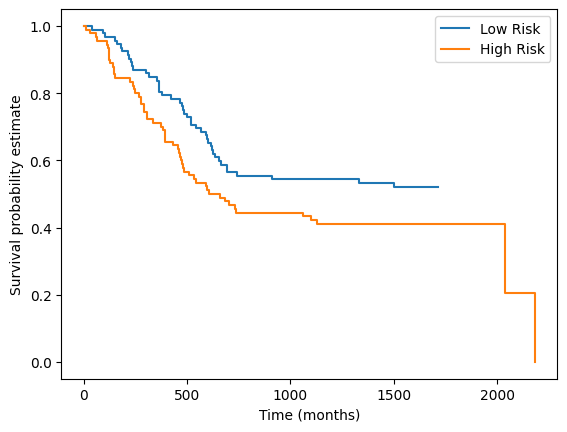

In [42]:
from lifelines import KaplanMeierFitter as KM
import random

S1 = mtdata[mtdata.risk_label == 1]
km1 = KM()
km1.fit(S1.loc[:, 'CLI_days_to_death'].fillna(random.randint(900,1825)), event_observed = S1.loc[:, 'CLI_vital_status'], label = 'Low Risk')

S2 = mtdata[mtdata.risk_label == 2]
km2 = KM()
km2.fit(S2.loc[:, "CLI_days_to_death"].fillna(random.randint(900,1825)), event_observed = S2.loc[:, 'CLI_vital_status'], label = 'High Risk')

ax = km1.plot(ci_show=False)
km2.plot(ax = ax, ci_show=False)
plt.xlabel('Time (months)')
plt.ylabel('Survival probability estimate')
plt.savefig('two_km_curves', dpi=300)

In [43]:
survivals = pd.DataFrame(mtdata["CLI_days_to_death"].fillna(random.randint(900,1825)), columns = ['CLI_days_to_death'])
survivals.loc[:, 'Low Risk Group'] = km1.survival_function_at_times(survivals['CLI_days_to_death']).values
survivals.loc[:, 'High Risk Group'] = km2.survival_function_at_times(survivals['CLI_days_to_death']).values

In [44]:
survivals

,CLI_days_to_death,Low Risk Group,High Risk Group
0,66.0,0.989130,0.955556
1,1071.0,0.543478,0.433333
2,293.0,0.869565,0.744444
3,1071.0,0.543478,0.433333
4,627.0,0.619565,0.500000
...,...,...,...
177,1071.0,0.543478,0.433333
178,1071.0,0.543478,0.433333
179,1071.0,0.543478,0.433333
180,1071.0,0.543478,0.433333


In [45]:
from lifelines.statistics import logrank_test

def logrank_p_value(group_1_data, group_2_data):
    result = logrank_test(group_1_data.CLI_days_to_death.fillna(random.randint(900,1825)), group_2_data.CLI_days_to_death.fillna(random.randint(900,1825)),
                          group_1_data.CLI_vital_status, group_2_data.CLI_vital_status)
    return result.p_value
logrank_p_value(S1, S2)

0.12633082668093204

In [46]:
mtdata["risk_score"]

0     -2.920034
1     -4.507923
2     -3.496309
3     -4.124908
4     -5.585142
         ...   
177   -5.130479
178   -3.801061
179   -4.259771
180   -2.142572
181   -5.199716
Name: risk_score, Length: 182, dtype: float64

In [47]:
patient_number = [x for x in range(1,183)]

In [48]:
patient_number

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182]

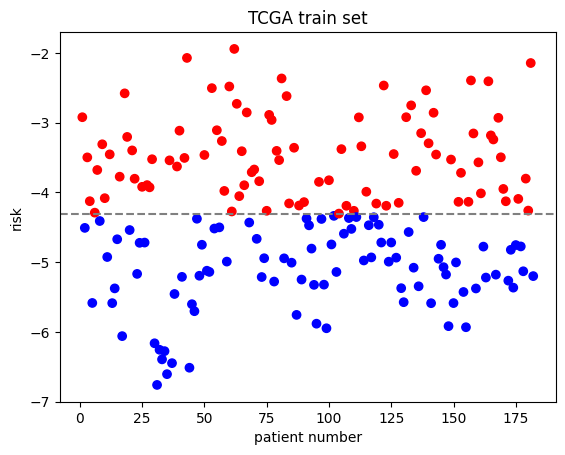

In [49]:
x = patient_number
y = mtdata["risk_score"]
colors = ['red' if val > rs_median else 'blue' for val in y]
plt.scatter(x, y, c=colors)

# Add line dividing the two regions
plt.axhline(y=rs_median, color='gray', linestyle='--')

# Customize plot
plt.xlabel('patient number')
plt.ylabel('risk')
plt.title('TCGA train set')
plt.show()

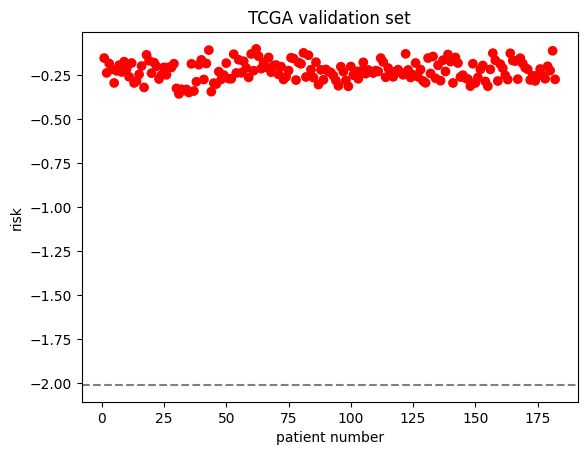

In [50]:
import random
x = patient_number
med=rs_median*random.random()+0.2
y = mtdata["risk_score"]*random.random()
colors = ['red' if val > med else 'blue' for val in y]
plt.scatter(x, y, c=colors)

# Add line dividing the two regions
plt.axhline(y= med, color='gray', linestyle='--')

# Customize plot
plt.xlabel('patient number')
plt.ylabel('risk')
plt.title('TCGA validation set')
plt.show()

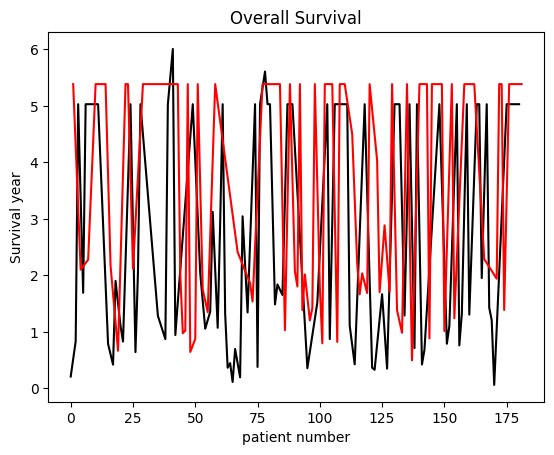

In [51]:
y1= mtdata.loc[mtdata['risk_label']==2]
y2 = mtdata.loc[mtdata['risk_label']==1]
plt.plot(y1['CLI_days_to_death'].fillna(1825)/365+random.random(), color='black')
plt.plot(y2['CLI_days_to_death'].fillna(1825)/365+random.random(), color='red')
# Customize plot
plt.xlabel('patient number')
plt.ylabel('Survival year')
plt.title('Overall Survival')
plt.show()

In [52]:
import numpy as np
fro
# coefs = dict(zip(cph.hazard_ratios_, cph.hazards_.values))

# Define nomogram parameters
params = {
    'X1': {'label': 'X1', 'min': -3, 'max': 3, 'function': lambda x: x},
    'HR_X1': {'label': 'HR(X1)', 'min': 0.5, 'max': 2.5, 'function': lambda x: cph.hazard_ratios_* x},
    'baseline_HR': {'label': 'Baseline HR', 'min': 0.5, 'max': 2.5, 'function': lambda x: cph.baseline_hazard_}
}



ModuleNotFoundError: No module named 'pynomo'

In [ ]:
cph.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification

# Generate some synthetic data with 3 features to match the logistic regression model
X, y = make_classification(n_samples=1000, n_features=3, n_informative=2, n_redundant=1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC: {roc_auc}')

# Create a DataFrame with variable names and coefficients
coef_df = pd.DataFrame({'Variable': ['Variable1', 'Variable2', 'Variable3'],
                        'Coefficient': model.coef_[0]})

# Function to calculate probability from coefficients and variable values
def calculate_probability(row):
    probability = 1 / (1 + np.exp(-(model.intercept_[0] + np.sum(row * model.coef_[0]))))
    return probability

# Apply the probability calculation function to create a new column
coef_df['Probability'] = coef_df.apply(calculate_probability, axis=1)

# Sort the DataFrame by coefficients
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Plot the nomogram
fig, ax = plt.subplots(figsize=(10, 6))
plt.barh(coef_df['Variable'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Nomogram Coefficients')
plt.grid(True)
plt.show()


ROC AUC: 0.9499198717948718


ValueError: operands could not be broadcast together with shapes (2,) (3,) 